In [ ]:
# 1-2. Google Drive 연동
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
# 1-1. 패키지 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys, os
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
font_images = os.listdir("/content/drive/MyDrive/fonts/32_font") 

In [ ]:
X = []
fontpath = "/content/drive/MyDrive/fonts/32_font/"
for imagename in font_images:
  img_path = os.path.join(fontpath, imagename)
  img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
  X.append(img)
  
Y = []
for name in font_images:
  font_name = name[-9:-4]
  Y.append(font_name)

In [ ]:
syllable = list(set(Y))
syllable_to_index = {syllable: index for index, syllable in enumerate(syllable)}

Y_idx = []

for idx in Y:
  font_idx = syllable_to_index[idx]
  Y_idx.append(font_idx)

In [ ]:
X = np.array(X)
Y_idx = np.array(Y_idx)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_idx, test_size=0.3, shuffle=True, random_state=1004)

In [ ]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (823, 32, 32)
X_test shape: (353, 32, 32)
y_train shape: (823,)
y_test shape: (353,)


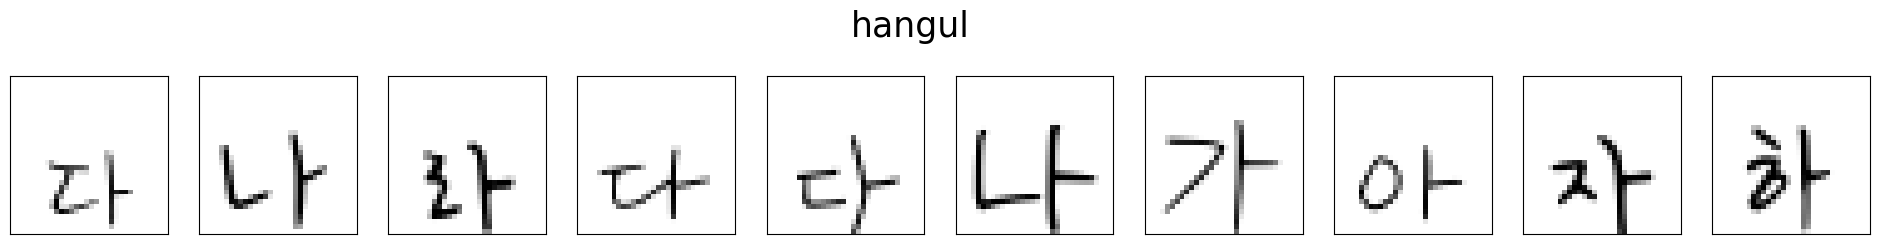

In [ ]:
plt.figure(figsize=(24,3))
plt.suptitle('hangul',fontsize = 25)

for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i],cmap='gray')
  plt.xticks([])
  plt.yticks([])

In [ ]:
x_train = X_train.reshape(823,32*32)
x_test = X_test.reshape(353,32*32)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train,14)
y_test = tf.keras.utils.to_categorical(y_test,14)

In [ ]:
dmlp = Sequential()
dmlp.add(Dense(units=1024,activation ='tanh', input_shape = (32*32,)))
dmlp.add(Dense(units= 512, activation = 'relu'))
dmlp.add(Dense(units= 512, activation = 'relu'))
dmlp.add(Dense(units= 14, activation = 'softmax'))

dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = 0.0001), metrics=['accuracy'])
hist= dmlp.fit(x_train,y_train,
        epochs= 100,
        batch_size = 128,
        validation_data=(x_test,y_test),
        verbose = 2)

print("정확률=",dmlp.evaluate(x_test,y_test,verbose = 0)[1] * 100)

Epoch 1/100
7/7 - 2s - loss: 2.6941 - accuracy: 0.0851 - val_loss: 2.6289 - val_accuracy: 0.0878 - 2s/epoch - 230ms/step
Epoch 2/100
7/7 - 0s - loss: 2.6118 - accuracy: 0.0996 - val_loss: 2.5983 - val_accuracy: 0.1105 - 67ms/epoch - 10ms/step
Epoch 3/100
7/7 - 0s - loss: 2.5782 - accuracy: 0.1507 - val_loss: 2.5722 - val_accuracy: 0.1445 - 52ms/epoch - 7ms/step
Epoch 4/100
7/7 - 0s - loss: 2.5353 - accuracy: 0.1920 - val_loss: 2.5363 - val_accuracy: 0.1926 - 63ms/epoch - 9ms/step
Epoch 5/100
7/7 - 0s - loss: 2.4884 - accuracy: 0.2612 - val_loss: 2.5156 - val_accuracy: 0.1813 - 57ms/epoch - 8ms/step
Epoch 6/100
7/7 - 0s - loss: 2.4558 - accuracy: 0.2224 - val_loss: 2.4765 - val_accuracy: 0.2606 - 53ms/epoch - 8ms/step
Epoch 7/100
7/7 - 0s - loss: 2.4162 - accuracy: 0.2479 - val_loss: 2.4574 - val_accuracy: 0.1870 - 52ms/epoch - 7ms/step
Epoch 8/100
7/7 - 0s - loss: 2.3600 - accuracy: 0.2977 - val_loss: 2.3954 - val_accuracy: 0.2380 - 64ms/epoch - 9ms/step
Epoch 9/100
7/7 - 0s - loss: 2.